In [1]:
import os
os.path.expanduser('~/.keras/models')

'C:\\Users\\dell/.keras/models'

In [3]:
from keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
import cv2

In [5]:
model = VGG16(weights='imagenet')

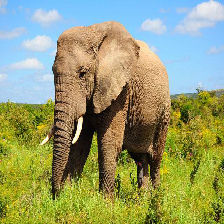

In [7]:
img_path = './elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
img

In [9]:
def predict(x_array):
    x = np.expand_dims(x_array, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x,verbose=0)
    cls,conf=decode_predictions(preds, top=3)[0][0][1:]
    return cls + " " + str(round(conf*100))+"%"

In [11]:
print(predict(x))

African_elephant 75%


In [15]:
capture = cv2.VideoCapture(0)

while (True):
    ret, frame = capture.read()
    if ret == True:
        resized_rgb=cv2.resize(frame,(224,224)) [:,:,::-1]
        cv2.putText(frame, predict(resized_rgb) , (10,30), cv2.FONT_HERSHEY_COMPLEX, 1, (0,170,0), 2)
        cv2.imshow('src', frame)
        
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
        
# Release camera and close windows
capture.release()
cv2.destroyAllWindows()  